In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
# Define a simple sequential model
def create_model():
  model = keras.Sequential([
      keras.layers.Dense(512, "sigmoid", input_shape=(784,)),
      keras.layers.Dense(11)]
  )
  model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5643      
Total params: 407,563
Trainable params: 407,563
Non-trainable params: 0
_________________________________________________________________


In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels
test_labels = test_labels

train_images = train_images.reshape(-1, 28 * 28) / 255.0
test_images = test_images.reshape(-1, 28 * 28) / 255.0
test_images.shape #this is one gigantic tensor of shape (10000, 784), so it contains a row for every digit sample

(10000, 784)

In [7]:
# #save the weights of the model

# checkpoint_path = "training_2/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# model.fit(train_images, 
#           train_labels,  
#           epochs=10,
#           validation_data=(test_images,test_labels),
#           callbacks=[cp_callback]
#           )
# #save and download weights
# from google.colab import files
# !zip -r /content/training_1.zip /content/training_1
# files.download('/content/training_1.zip') 

In [8]:
#load the weights of the model
model.load_weights(r"training_1/cp.ckpt")

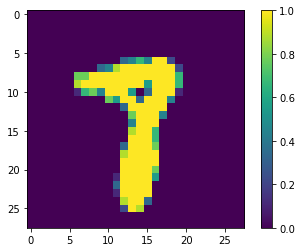

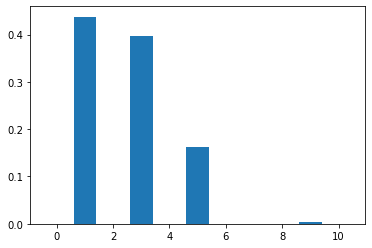

the solution is: 8
the model thinks it is: 1
the propabilities for the different categories:
array([3.4386463e-07, 4.3768990e-01, 3.4229808e-05, 3.9634532e-01,
       7.6241184e-07, 1.6148923e-01, 1.7710967e-07, 1.4187739e-04,
       1.3706085e-04, 4.1609849e-03, 1.9044171e-08], dtype=float32)


In [46]:
probability_model = tf.keras.Sequential([
                                        #  tf.keras.layers.Reshape((-1,28*28), input_shape= ),
                                         model, 
                                         tf.keras.layers.Softmax()]) #this is just our model with a layer behind it that turns the output into propabilities
#print(train_images[datapoint].reshape(-1, 28*28).shape)

#get the propability for the given data point
propability = probability_model.predict(train_images[datapoint].reshape(-1, 28*28))



#show the datapoint and the label
datapoint = 5896

#plot

plt.figure()
plt.imshow(train_images[datapoint].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

plt.bar(range(len(propability.flatten())), propability.flatten())
plt.show()


print( f"the solution is: {train_labels[datapoint]}")

print(f"the model thinks it is: {np.argmax(propability)}")

print(f"the propabilities for the different categories:")

from pprint import pprint #pretty print
pprint(propability.flatten())

In [10]:
#testing the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
#loss: 0.0759 - accuracy: 0.9839
#loss: 0.0860 - accuracy: 0.9830

313/313 - 0s - loss: 0.0627 - accuracy: 0.9813


In [ ]:
#look where the model was wrong
for i in range(len(train_labels)):
    prediction = np.argmax(probability_model.predict(train_images[i].reshape(-1, 28*28)))
    if prediction != train_labels[i]:
        print(i)